### Moon 데이터 만들기
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html?highlight=make_moons

In [1]:
import matplotlib.pyplot as plt

In [2]:
# 엇갈린채 마주보는 두개의 초승달 형태로 2차원 데이터 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


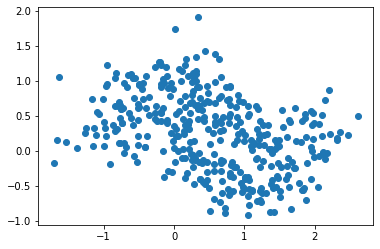

In [4]:
plt.scatter(X_train[:,0],X_train[:,1])

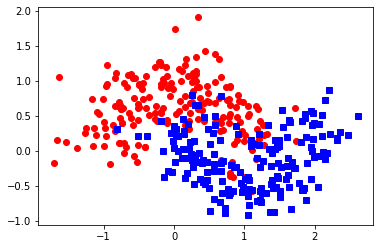

In [5]:
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "ro", alpha=1)
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", alpha=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metric

### Decision tree classifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [8]:
y_pred_tree = tree_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.848


### Visualization

In [9]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


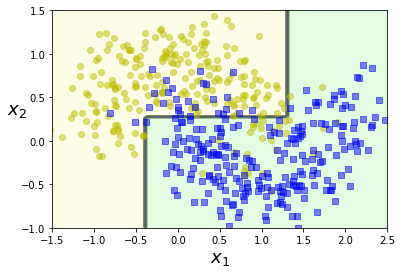

In [10]:
plot_decision_boundary(tree_clf,X,y)

### plot_tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

In [11]:
from sklearn import tree

[Text(167.4, 190.26, 'X[1] <= 0.277\ngini = 0.5\nsamples = 375\nvalue = [192, 183]'),
 Text(83.7, 135.9, 'X[0] <= -0.398\ngini = 0.328\nsamples = 189\nvalue = [39, 150]'),
 Text(41.85, 81.53999999999999, 'X[0] <= -0.517\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 0.087\ngini = 0.201\nsamples = 168\nvalue = [19, 149]'),
 Text(104.625, 27.180000000000007, 'gini = 0.129\nsamples = 130\nvalue = [9, 121]'),
 Text(146.475, 27.180000000000007, 'gini = 0.388\nsamples = 38\nvalue = [10, 28]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 1.299\ngini = 0.292\nsamples = 186\nvalue = [153, 33]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 0.371\ngini = 0.172\nsamples = 168\nvalue = [152, 16]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.492\nsamples = 16\nvalue =

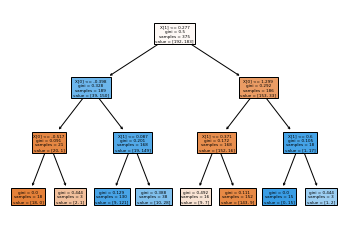

In [12]:
tree.plot_tree(tree_clf,filled=True)

In [13]:
from sklearn import neighbors, datasets

n_neighbors = 20

knn_clf = neighbors.KNeighborsClassifier(n_neighbors)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [14]:
Z = knn_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, Z))
print('Recall =', metric.recall_score(y_test, Z))
print('Precision =', metric.precision_score(y_test, Z))
print('f1-score =', metric.f1_score(y_test, Z))

Accuracy = 0.872
Recall = 0.8507462686567164
Precision = 0.9047619047619048
f1-score = 0.8769230769230769


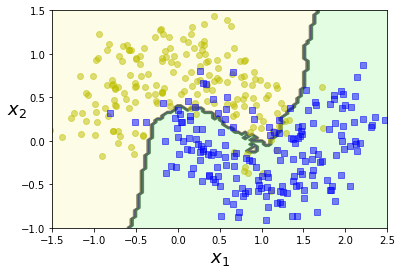

In [15]:
plot_decision_boundary(knn_clf,X_train,y_train)

In [16]:
# hyperparameter : 사용자가 지정하는 파라미터